<a href="https://colab.research.google.com/github/KimJaeHo2602/Covid-classification/blob/main/covid_FB_Prophet_Algorithm_22_10_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. 데이터셋 준비하기
https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.options.display.float_format = '{:.5f}'.format
#소수점 다섯자리까지

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'jaehokim123'
os.environ['KAGGLE_KEY'] = '31f0a9e622197f78f754287a7258bf9a'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'



rm: cannot remove '*.*': No such file or directory
  0% 0.00/9.79M [00:00<?, ?B/s]
100% 9.79M/9.79M [00:00<00:00, 119MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')


In [ ]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,201014,201096,201212,201276,201503,201557,201750,201949,202026,202108
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,332598,332619,332638,332645,332673,332701,332719,332739,332754,332772
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,270734,270734,270740,270757,270766,270768,270769,270771,270771,270783
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,46366,46366,46366,46366,46366,46449,46449,46449,46449,46449
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [ ]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,7809,7811,7811,7811,7812,7812,7814,7818,7818,7818
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,3591,3591,3591,3592,3592,3592,3592,3592,3592,3592
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


## Step 2. 데이터 구조 변경 및 시각화하기


### 문제 4. 데이터 프레임 구조를 Date를 Index로, 지역을 Column으로 변경

In [ ]:
df_case['Country/Region'].value_counts() #국가가 여러개로 나뉘어져 있는 걸 볼수있다. 나뉘어져 있는걸 결합해야햐한다.

China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [ ]:
#하나씩 없애보면서 공부해봐!
#  df = df.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum()#나뉘어져 있는걸 결합한다.
#  df = df.transpose() # 날짜가 index가 되게한다.
#  df.index.name = 'Date' #index 이름을 Date로 설정
#  df.reset_index(inplace=True)#인덱스 내용을 수정.
#  df['Date'] = df['Date'].apply(lambda s : pd.to_datetime(str(s))) #날짜로 변환
#  df.set_index('Date', inplace=True) #set index를 이용하여 date를 index로 바꿔준다
#  return df

In [ ]:
def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df = df.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum()
  #Lat: 지역의 위도 , Long: 지역의 경도를 drop시키고, 을나뉘어져 있는 Country와 Rigion을 결합한다.
  df = df.transpose() # 날짜가 index가 되게한다.
  df.index.name = 'Date' #index 이름을 Date로 설정
  df.reset_index(inplace=True)#인덱스 내용을 수정.
  df['Date'] = df['Date'].apply(lambda s : pd.to_datetime(str(s))) #날짜로 변환
  df.set_index('Date', inplace=True) #set index를 이용하여 date를 index로 바꿔준다
  return df

In [ ]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [ ]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,201557,332701,270768,46449,103131,11,9106,9715464,444869,10313911,...,988527,244424,11976,545469,11495231,702804,535,11939,333644,257893
2022-10-20,201750,332719,270769,46449,103131,11,9106,9715464,444869,10341058,...,988527,244436,11976,545469,11495772,702804,535,11939,333644,257893
2022-10-21,201949,332739,270771,46449,103131,11,9106,9715464,444869,10341878,...,988527,244450,11976,545523,11496354,702804,535,11939,333644,257893


In [ ]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,7812,3592,6881,155,1917,0,146,129970,8706,15496,...,7510,1637,14,5820,43159,5707,0,2158,4017,5606
2022-10-20,7814,3592,6881,155,1917,0,146,129970,8706,15530,...,7510,1637,14,5820,43159,5707,0,2158,4017,5606
2022-10-21,7818,3592,6881,155,1917,0,146,129970,8706,15569,...,7510,1637,14,5820,43159,5707,0,2158,4017,5606


In [ ]:
df_case.sum()

Country/Region
Afghanistan             101628944
Albania                 139837963
Algeria                 145586837
Andorra                  18047164
Angola                   45691794
                          ...    
West Bank and Gaza      316211022
Winter Olympics 2022       141167
Yemen                     6243026
Zambia                  149788521
Zimbabwe                104716863
Length: 201, dtype: int64

In [ ]:
df_death.sum()

Country/Region
Afghanistan             4345077
Albania                 1992850
Algeria                 3958578
Andorra                  105088
Angola                   967897
                         ...   
West Bank and Gaza      2972713
Winter Olympics 2022          0
Yemen                   1219674
Zambia                  2079402
Zimbabwe                2688844
Length: 201, dtype: int64

### 문제 5. 나라별 확진자 수 및 사망자 수 시각화하기


Country/Region
US                97198630
India             44644076
France            36741974
Germany           35172694
Brazil            34780462
Korea, South      25311636
United Kingdom    24079325
Italy             23348075
Japan             22020274
Russia            21068678
Name: 2022-10-23 00:00:00, dtype: int64


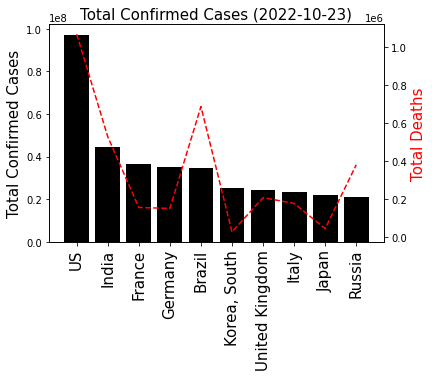

In [ ]:
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
#[df_case.index[-1]]:마지막 날짜를 뽑아온다
#loc : 인덱스 기준으로 행 데이터 읽기.
#sort_values(ascending=False) 확진자수가 높은수가 위에 오도록 내림차순으로 바꾼다.
#[:10] 10국가만 남긴다.
print(top_ten_cases)
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')
#top_ten_cases를 barpolot을 이용해 그려보기. 아직 순서가 다르다.
#df_death.loc[df_death.index[-1]].sort_values(ascending=False)[:10]
#그대로 소팅을 하면 순서가 다르다
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
#따라서 탑 탠에서 가져온 그대로 daths로 동일한 기준을 가져온다.
#plt.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
#빨간 선. 즉 death의 선 이대로 한다면 확진자수 보다 사망자수가 압도적으로 많아 빨간색이 아래에만 나타난다.
plt.xticks(rotation=90, size=15) #x 데이터를 90도로 회전(즉 국가들)
plt.ylabel('Total Confirmed Cases', size=15) #x표의 이름을 주고 사이즈 15
plt.xlabel('') #y표의 이름을 없앤다. y표의 원래이름은 Country/Region이었다.
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15 )
#title을 주고, 날짜를 적는다.

ax = plt.gca() #matplotlib 객체에 대한 정보는 plt.gea() 함수로 구할 수 있다.
#gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다. 경우에 따라서 유용하게 사용된다. 이 두 함수는 만약 현재의 Axes나 Figure가 없을 경우 새로 생성한다
ax2 = ax.twinx()
#tiwnx 동일한 x를 공유하면서 서로 다른 y를 가진다. x를 공유하고, y가 2개이다.
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

In [ ]:
top_ten_cases

Country/Region
US                97198630
India             44644076
France            36741974
Germany           35172694
Brazil            34780462
Korea, South      25311636
United Kingdom    24079325
Italy             23348075
Japan             22020274
Russia            21068678
Name: 2022-10-23 00:00:00, dtype: int64

In [ ]:
# 이 셀의 결과가 지워지지 않도록 주의하세요.

### 문제 6. 특정 국가의 확진자 수 및 사망자 수 변화 시각화하기

In [ ]:
def plot_case_with_death(country):
  plt.plot(df_case.index, df_case[country], 'b-')
  plt.ylabel('Confirmed Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlabel('Date')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)
  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)
  plt.show()

In [ ]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
  plt.plot(df_case.index, df_case[country],'b-') #def_case를 일단  plot한다. index가 날짜
  plt.ylabel('Confirmed Cases', color='blue') #y축
  plt.title(country+ '  Cases & Deaths') #title
  plt.xlim(right=df_case.index[-1])#xlim : x의 limit를 정해준다. 그래프가 # 오른쪽 끝에 붙는다
  plt.xlabel('Date')
  plt.ylim(0, df_case[country].max()*1.1) #파란색선 발생자 수가 밑에 붙는다.
  ax = plt.gca() #matplotlib 객체에 대한 정보는 plt.gea() 함수로 구할 수 있다.
#gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다. 경우에 따라서 유용하게 사용된다. 이 두 함수는 만약 현재의 Axes나 Figure가 없을 경우 새로 생성한다
  ax2 = ax.twinx() #tiwnx 동일한 x를 공유하면서 서로 다른 y를 가진다. x를 공유하고, y가 2개이다.
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3) #빨간색선 사망자수가 밑에 붙는다.
  plt.show()





## 그래프 그릴때, method들의 정의를 직접 찾아가며 공부해간다. 그렇지않으면 의미를 모르고 쓰이는경우가 많기 때문 !!

In [ ]:
# plot_case_with_death(country)

In [ ]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (14,4)

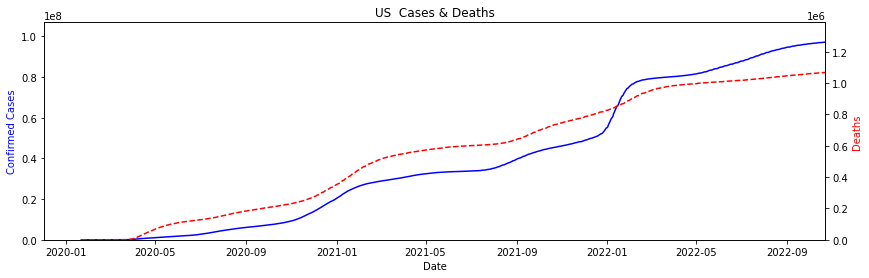

In [ ]:
plot_case_with_death('US')

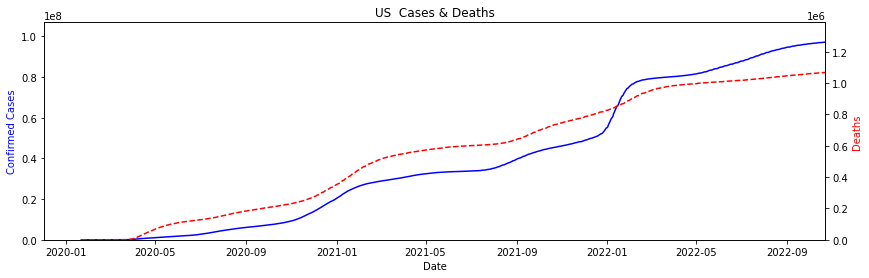

In [ ]:
# 아래와 같은 결과가 나오도록 하시오. 결과가 지워지지 않도록 주의하세요.
plot_case_with_death('US')
#y축 그래프위 1e7는 ‘1 x 10의7제곱’천만

In [ ]:
for c in df_case.columns:
  print(c)

Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, North
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar


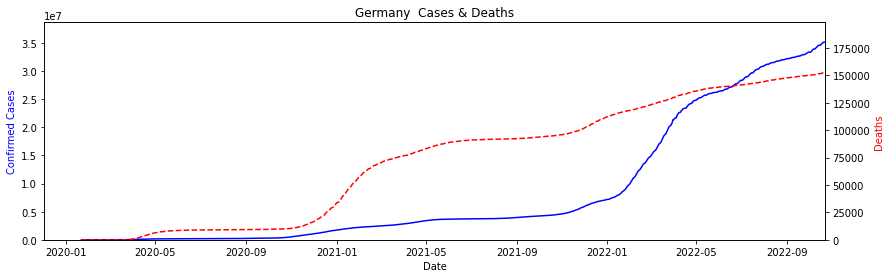

In [ ]:
plot_case_with_death('Germany')

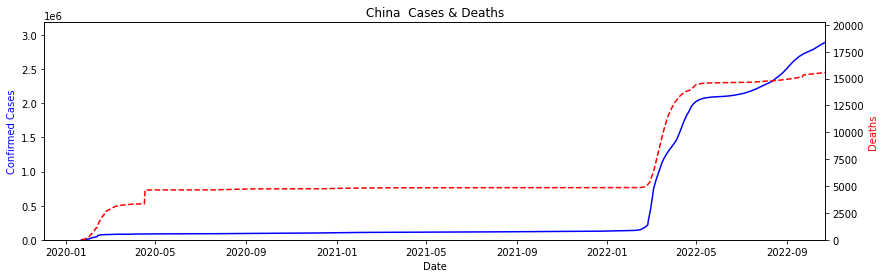

In [ ]:
plot_case_with_death('China')

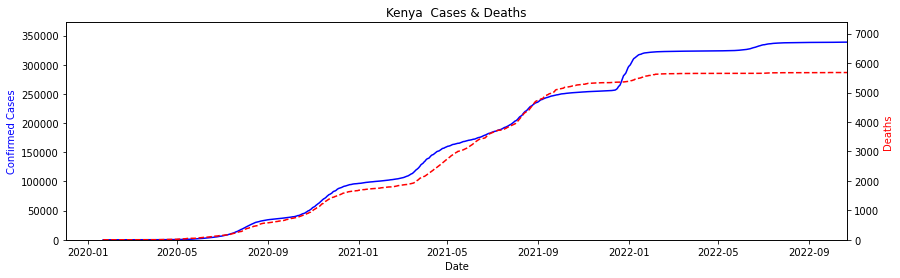

In [ ]:
plot_case_with_death('Kenya')

### 문제 7. 한국의 확진자 수 및 사망자 수 변화 시각화/분석하기

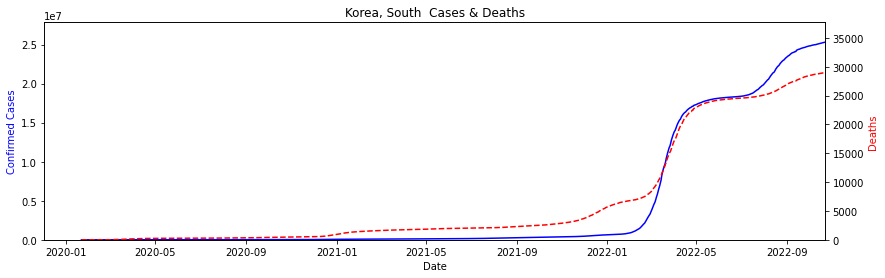

In [ ]:
# 한국의 누적 확진자 수/사망자 수를 시각화하고 분석하시오.
plot_case_with_death('Korea, South')

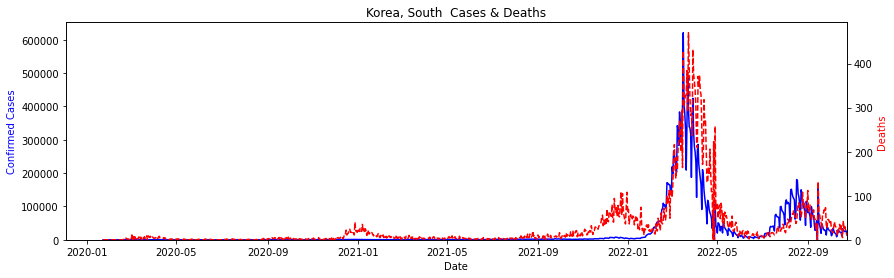

In [ ]:
# 한국의 일일 확진자 수/사망자 수를 시각화하고 분석하시오.
#일일 확진자는 diff만주면된다.

country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(),'b-') #def_case를 일단  plot한다. index가 날짜, 일일 확진자는 diff만주면된다.
plt.ylabel('Confirmed Cases', color='blue') #y축
plt.title(country+ '  Cases & Deaths') #title
plt.xlim(right=df_case.index[-1])#xlim : x의 limit를 정해준다. 그래프가 # 오른쪽 끝에 붙는다
plt.xlabel('Date')
plt.ylim(bottom = 0) #바닥을 0으로 준다.

ax = plt.gca() #matplotlib 객체에 대한 정보는 plt.gea() 함수로 구할 수 있다.
#gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다. 경우에 따라서 유용하게 사용된다. 이 두 함수는 만약 현재의 Axes나 Figure가 없을 경우 새로 생성한다
ax2 = ax.twinx() #tiwnx 동일한 x를 공유하면서 서로 다른 y를 가진다. x를 공유하고, y가 2개이다.
ax2.plot(df_death.index, df_death[country].diff(), 'r--') #일일 확진자는 diff만주면된다.
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0) #빨간색선 사망자수가 밑에 붙는다.
plt.show()


## Step 3. Plotly를 이용하여 데이터 시각화하기

### 문제 8. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [ ]:
import plotly.graph_objects as go

In [ ]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [ ]:
df_code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [ ]:
df_case.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [ ]:
country_to_code = df_code.set_index('COUNTRY')['CODE']
# 컨트리를 코드로 바꿔주기 위함.

In [ ]:
df_c = df_case.rename(country_renamer,axis=1).copy()
#코드나열(국가이름 코드)이름 코드 , df_c라는 데이터 코드로 변경하고싶다.
#axis=1이 되어야  컬럼에 대해서 적용이된다. 나라이름을 df_c에 넣는다.
df_c


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,201557,332701,270768,46449,103131,11,9106,9715464,444869,10313911,...,988527,244424,11976,545469,11495231,702804,535,11939,333644,257893
2022-10-20,201750,332719,270769,46449,103131,11,9106,9715464,444869,10341058,...,988527,244436,11976,545469,11495772,702804,535,11939,333644,257893
2022-10-21,201949,332739,270771,46449,103131,11,9106,9715464,444869,10341878,...,988527,244450,11976,545523,11496354,702804,535,11939,333644,257893


In [ ]:
for col in df_c.columns:
  if col not in country_to_code.index: #renamer을 이용할 때, country가 없는경우에는, rename을 남겨도 country로 있을때
    df_c.drop(col, axis=1, inplace=True) #country를 삭제.
df_code = df_c.rename(country_to_code, axis=1)
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,...,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,201557,332701,270768,46449,103131,9106,9715464,444869,10313911,5369885,...,24021973,988527,244424,11976,545469,11495231,702804,11939,333644,257893
2022-10-20,201750,332719,270769,46449,103131,9106,9715464,444869,10341058,5379734,...,24078702,988527,244436,11976,545469,11495772,702804,11939,333644,257893
2022-10-21,201949,332739,270771,46449,103131,9106,9715464,444869,10341878,5387830,...,24079325,988527,244450,11976,545523,11496354,702804,11939,333644,257893


In [ ]:
for c in df_code.columns:
  print(c)
#확실하게 보기위해 컬럼으로본다. 국가이름 없이 모두 코드로 잘 변경 되었다.

AFG
ALB
DZA
AND
AGO
ATG
ARG
ARM
AUS
AUT
AZE
BHM
BHR
BGD
BRB
BLR
BEL
BLZ
BEN
BTN
BOL
BIH
BWA
BRA
BRN
BGR
BFA
MMR
BDI
CPV
KHM
CMR
CAN
CAF
TCD
CHL
CHN
COL
COM
COG
COD
CRI
CIV
HRV
CUB
CYP
CZE
DNK
DJI
DMA
DOM
ECU
EGY
SLV
GNQ
ERI
EST
SWZ
ETH
FJI
FIN
FRA
GAB
GMB
GEO
DEU
GHA
GRC
GRD
GTM
GIN
GNB
GUY
HTI
HND
HUN
ISL
IND
IDN
IRN
IRQ
IRL
ISR
ITA
JAM
JPN
JOR
KAZ
KEN
KIR
PRK
KOR
KSV
KWT
KGZ
LAO
LVA
LBN
LSO
LBR
LBY
LIE
LTU
LUX
MDG
MWI
MYS
MDV
MLI
MLT
MHL
MRT
MUS
MEX
MDA
MCO
MNG
MNE
MAR
MOZ
NAM
NPL
NLD
NZL
NIC
NER
NGA
MKD
NOR
OMN
PAK
PLW
PAN
PNG
PRY
PER
PHL
POL
PRT
QAT
ROU
RUS
RWA
KNA
LCA
VCT
WSM
SMR
STP
SAU
SEN
SRB
SYC
SLE
SGP
SVK
SVN
SLB
SOM
ZAF
SSD
ESP
LKA
SDN
SUR
SWE
CHE
SYR
TWN
TJK
TZA
THA
TLS
TGO
TON
TTO
TUN
TUR
TUV
USA
UGA
UKR
ARE
GBR
URY
UZB
VUT
VEN
VNM
WBG
YEM
ZMB
ZWE


# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    z = df['GDP (BILLIONS)'],
    text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP<br>Billions US$',
))

fig.update_layout(
    title_text='2014 Global GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

In [ ]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
  data = go.Choropleth(
    locations = df_code.columns,
    z = df_code.loc[date],
    text = df_c.columns,
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Confirmed Cases',
  )
  return data


### 문제 9. Choropleth map 시각화하기

In [ ]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
date = df_case.index[-1] #가장 최근값 1,30, 365등을 입력해, 1일, 30일, 365일 후를 예측 할 수 있다.
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in '+str(date), # str(date)는 날짜로 변환
        geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'
        )
)

fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리

### 문제 10. FBProphet 학습을 위한 데이터프레임 생성

In [ ]:
df_case.reset_index()[['Date', 'Korea, South']].to_numpy()
#리셋 인덱스에서 데이트를 인덱스에서 뽑아왔고, date,korea south로 보여준다.
#to_numpy() 값만 보여준다.

array([[Timestamp('2020-01-22 00:00:00'), 1],
       [Timestamp('2020-01-23 00:00:00'), 1],
       [Timestamp('2020-01-24 00:00:00'), 2],
       ...,
       [Timestamp('2022-10-21 00:00:00'), 25271078],
       [Timestamp('2022-10-22 00:00:00'), 25297334],
       [Timestamp('2022-10-23 00:00:00'), 25311636]], dtype=object)

In [ ]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.

df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds','y'])

df


,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334


### 문제 11. 학습데이터와 테스트데이터 분리하기


In [ ]:
from math import floor

In [ ]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1 - test_size)) #전체중에 1에서 뺸 사이즈
  return df.loc[:div], df.loc[div + 1:]

#2분 30초~
#test size만 입력받아 데이터프레임을 트레이닝용 데이터프레임과 테스트용 데이터프레임으로 나눠준다.
#나누고자 하는 숫자만 정해주면 쉽다 floor을 이용해서 전체(df.shape[0])* (1-test_size)
#테스트 사이즈가 0.3이다 하면 0.7만큼을 트레이닝에 쓰고 나머지를 테스트에쓴다.
#따라서 전체중에 테스트 사이즈를 1에서뺀다.
#df.loc[:div] 처음부터 div까지 트레인, df.loc[div:] div부터 나머지를 테스트용.

In [ ]:
train_df, test_df = train_test_split_df(df, 0.1)
train_df.shape
#450일동안 훈련

(906, 2)

In [ ]:
train_df.tail()

,ds,y
901,2022-07-11,18561861
902,2022-07-12,18602109
903,2022-07-13,18641278
904,2022-07-14,18680142
905,2022-07-15,18721415


In [ ]:
test_df.shape
#49일동안의 기록

(100, 2)

In [ ]:
test_df.head()

,ds,y
906,2022-07-16,18761757
907,2022-07-17,18788056
908,2022-07-18,18861593
909,2022-07-19,18937971
910,2022-07-20,19009080


In [ ]:
test_df

,ds,y
906,2022-07-16,18761757
907,2022-07-17,18788056
908,2022-07-18,18861593
909,2022-07-19,18937971
910,2022-07-20,19009080
...,...,...
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334


In [ ]:
test_df.tail()

,ds,y
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334
1005,2022-10-23,25311636


In [ ]:
df1 = df.diff()

In [ ]:
df1

,ds,y
0,NaT,NaN
1,1 days,0
2,1 days,1
3,1 days,0
4,1 days,1
...,...,...
1001,1 days,25369
1002,1 days,24709
1003,1 days,26823
1004,1 days,26256


## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fb prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fb: filename=fb-0.4.0-py3-none-any.whl size=7181 sha256=4b2837fe0a0d3ce858bb62186b5ca2cc6812b330ae815992ac3c881232a18aa4
  Stored in directory: /root/.cache/pip/wheels/f6/06/c9/e290b4d38e59fcf84109b65abedc4365970da1ca9cccde9972
Successfully built fb


In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet(changepoint_range=1.0) # 모델생성
model.fit(train_df)
#급격한 변화를 따르기위해 changepoint_range=1.0을 넣는다.
# 모델 학습(사이킷 런과 같다.).train_df에 데이터스탬프와 y(우리가 학습하고자 하는대상)이 같이 들어있다.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/n56u47ck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/gr53p7ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79043', 'data', 'file=/tmp/tmp9sib6oap/n56u47ck.json', 'init=/tmp/tmp9sib6oap/gr53p7ua.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_modelkg7njo1a/prophet_model-20221024134033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 문제 13. Prophet 모델 학습 결과 시각화하기

In [ ]:
from prophet.plot import add_changepoints_to_plot

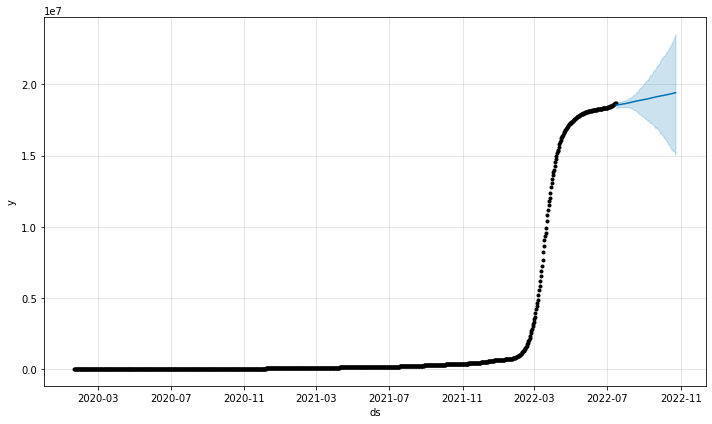

In [ ]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용
# model.plot() 메소드
pred = model.predict(test_df) #test_df에 대해 예측한다.
model.plot(pred);
# 직접 그릴필요가 없다! 그려주니까! 세미콜론을 붙이면 그래프가 하나만 나온다. 하나만 나온다.
# 검정색 부분이 트레이닝에 사용된 실제 과거데이터이고,
# 뒤에 파란색은 prediction에 사용된 데이터이다. 뒷부분에 떨어진 부분은 급격한 데이터를 따르지못한다.
# changepoint_range=1.0를 사용해 급격한 데이터를 따를 수 있게한다.
# 하늘색은 95% 신뢰구간을 의미한다.

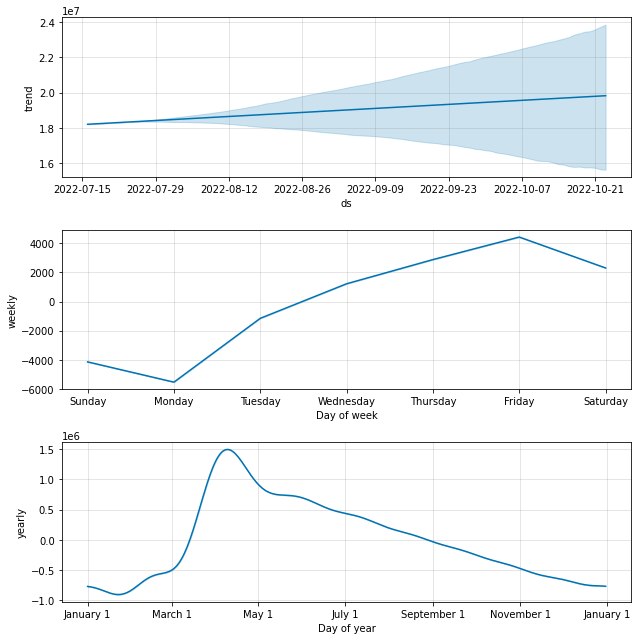

In [ ]:
model.plot_components(pred,);

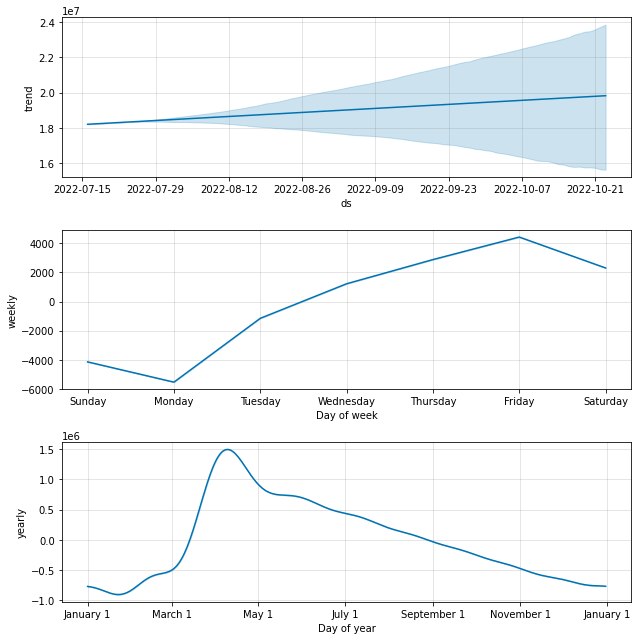

In [ ]:
model.plot_components(pred, uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=0);


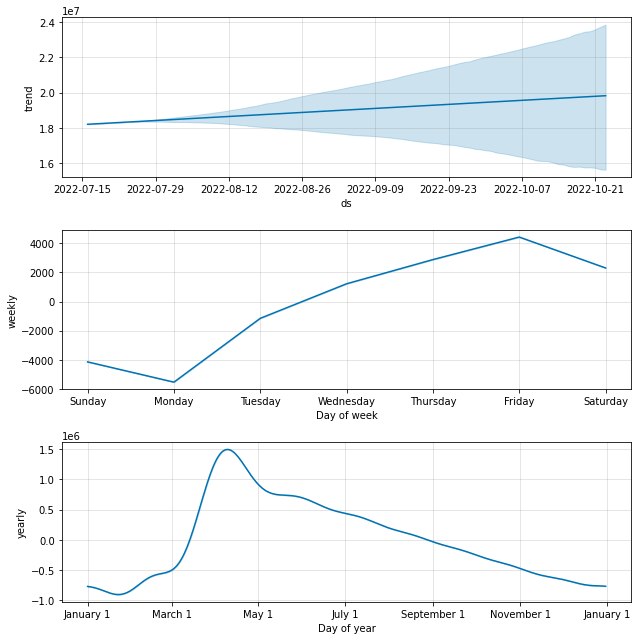

In [ ]:
#model.plot_components() 메소드 사용
model.plot_components(pred);
#전체적으로 증가하는 트렌드
#월요일에는 증가세가 줄고 수요일부터 토요일까지 증가한다.(주마다 사람들이 많이 돌아다녔다는 뜻)

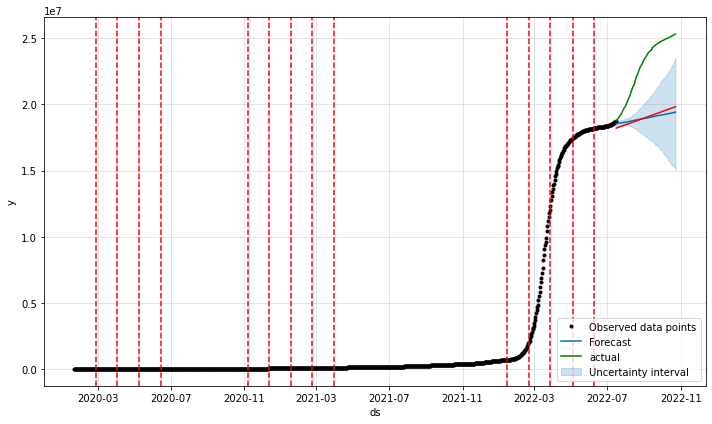

In [ ]:
#실제데이터와비교
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual') #실제데이터
changes = add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

#빨간선이 예측값, 초록선이 실제값. 신뢰구간은 95프로지만, 예측값보다, 실제값이 감염자 수가 더욱 많다.

### 문제 14. 모델 학습 결과 평가하기

In [ ]:
#사이킷런을 통해서 모델 학습 결과를 평가한다.
from sklearn.metrics import r2_score

In [ ]:
# 최대 줄 수 설정
pd.set_option('display.max_rows', 50)
# 최대 열 수 설정
pd.set_option('display.max_columns', 50)
# 표시할 가로의 길이
pd.set_option('display.width', 10000)

pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-16,1.820807e+07,1.834972e+07,1.873324e+07,1.820807e+07,1.820807e+07,344282.589456,344282.589456,344282.589456,2304.271168,2304.271168,2304.271168,341978.318288,341978.318288,341978.318288,0.0,0.0,0.0,1.855235e+07
1,2022-07-17,1.822439e+07,1.836371e+07,1.875538e+07,1.822439e+07,1.822439e+07,328899.521572,328899.521572,328899.521572,-4142.650120,-4142.650120,-4142.650120,333042.171692,333042.171692,333042.171692,0.0,0.0,0.0,1.855329e+07
2,2022-07-18,1.824072e+07,1.836202e+07,1.876897e+07,1.824072e+07,1.824072e+07,318306.616847,318306.616847,318306.616847,-5533.741194,-5533.741194,-5533.741194,323840.358041,323840.358041,323840.358041,0.0,0.0,0.0,1.855902e+07
3,2022-07-19,1.825704e+07,1.837126e+07,1.875750e+07,1.825704e+07,1.825704e+07,313262.771037,313262.771037,313262.771037,-1152.682101,-1152.682101,-1152.682101,314415.453138,314415.453138,314415.453138,0.0,0.0,0.0,1.857030e+07
4,2022-07-20,1.827336e+07,1.838280e+07,1.878297e+07,1.827336e+07,1.827336e+07,306034.049109,306034.049109,306034.049109,1219.312886,1219.312886,1219.312886,304814.736223,304814.736223,304814.736223,0.0,0.0,0.0,1.857940e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-10-19,1.975881e+07,1.531562e+07,2.304446e+07,1.576265e+07,2.345073e+07,-379148.807034,-379148.807034,-379148.807034,1219.312886,1219.312886,1219.312886,-380368.119920,-380368.119920,-380368.119920,0.0,0.0,0.0,1.937967e+07
96,2022-10-20,1.977514e+07,1.538668e+07,2.319407e+07,1.576670e+07,2.347528e+07,-383767.762545,-383767.762545,-383767.762545,2878.876231,2878.876231,2878.876231,-386646.638775,-386646.638775,-386646.638775,0.0,0.0,0.0,1.939137e+07
97,2022-10-21,1.979146e+07,1.527334e+07,2.328949e+07,1.574275e+07,2.358288e+07,-388570.229356,-388570.229356,-388570.229356,4426.613130,4426.613130,4426.613130,-392996.842486,-392996.842486,-392996.842486,0.0,0.0,0.0,1.940289e+07
98,2022-10-22,1.980778e+07,1.522782e+07,2.337177e+07,1.565104e+07,2.372538e+07,-397148.931541,-397148.931541,-397148.931541,2304.271168,2304.271168,2304.271168,-399453.202709,-399453.202709,-399453.202709,0.0,0.0,0.0,1.941064e+07


In [ ]:
pd.options.display.float_format = '{:.0f}'.format
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-16,18208070,18349724,18733242,18208070,18208070,344283,344283,344283,2304,2304,2304,341978,341978,341978,0,0,0,18552353
1,2022-07-17,18224394,18363711,18755379,18224394,18224394,328900,328900,328900,-4143,-4143,-4143,333042,333042,333042,0,0,0,18553293
2,2022-07-18,18240717,18362022,18768972,18240717,18240717,318307,318307,318307,-5534,-5534,-5534,323840,323840,323840,0,0,0,18559024
3,2022-07-19,18257041,18371262,18757504,18257041,18257041,313263,313263,313263,-1153,-1153,-1153,314415,314415,314415,0,0,0,18570304
4,2022-07-20,18273365,18382800,18782968,18273365,18273365,306034,306034,306034,1219,1219,1219,304815,304815,304815,0,0,0,18579399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-10-19,19758814,15315625,23044459,15762649,23450734,-379149,-379149,-379149,1219,1219,1219,-380368,-380368,-380368,0,0,0,19379665
96,2022-10-20,19775138,15386685,23194072,15766701,23475277,-383768,-383768,-383768,2879,2879,2879,-386647,-386647,-386647,0,0,0,19391370
97,2022-10-21,19791461,15273336,23289486,15742748,23582880,-388570,-388570,-388570,4427,4427,4427,-392997,-392997,-392997,0,0,0,19402891
98,2022-10-22,19807785,15227819,23371768,15651037,23725377,-397149,-397149,-397149,2304,2304,2304,-399453,-399453,-399453,0,0,0,19410636


In [ ]:
pred[["ds","yhat"]]

,ds,yhat
0,2022-07-16,18552353
1,2022-07-17,18553293
2,2022-07-18,18559024
3,2022-07-19,18570304
4,2022-07-20,18579399
...,...,...
95,2022-10-19,19379665
96,2022-10-20,19391370
97,2022-10-21,19402891
98,2022-10-22,19410636


In [ ]:
# test_df와 pred를 비교하여 r2_score 평가
#r2_score 1에 가까울수록 잘 예측된것이고 0에 가까울수록(음수가 될 수도있다.) 예측이 잘 되지않았다.
print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))
#yhat이란건 predicton값이라는걸 의미한다.

R2 Score:  -3.0514797101343145


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(test_df['y'], pred['yhat']))

MAE:  3869988.409597282


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_df['y'], pred['yhat'])
print("RMSE:" , np.sqrt(MSE))

RMSE: 4308789.241995762


In [ ]:
pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2022-10-19,19758814,15315625,23044459,15762649,23450734,-379149,-379149,-379149,1219,1219,1219,-380368,-380368,-380368,0,0,0,19379665
96,2022-10-20,19775138,15386685,23194072,15766701,23475277,-383768,-383768,-383768,2879,2879,2879,-386647,-386647,-386647,0,0,0,19391370
97,2022-10-21,19791461,15273336,23289486,15742748,23582880,-388570,-388570,-388570,4427,4427,4427,-392997,-392997,-392997,0,0,0,19402891
98,2022-10-22,19807785,15227819,23371768,15651037,23725377,-397149,-397149,-397149,2304,2304,2304,-399453,-399453,-399453,0,0,0,19410636
99,2022-10-23,19824109,15071250,23534728,15632033,23848923,-410190,-410190,-410190,-4143,-4143,-4143,-406047,-406047,-406047,0,0,0,19413919


### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/h_ts4_e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/wxw184d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95086', 'data', 'file=/tmp/tmp9sib6oap/h_ts4_e8.json', 'init=/tmp/tmp9sib6oap/wxw184d9.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_modelrqpiu3_s/prophet_model-20221024134038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


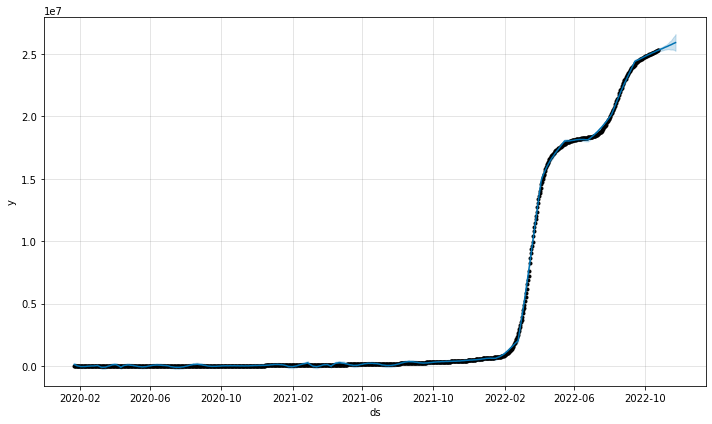

In [ ]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용

model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,1076782,-5950,260916,1076782,1076782,-949199,-949199,-949199,2909,2909,2909,-952108,-952108,-952108,0,0,0,127583
1,2020-01-23,1061851,-30385,242432,1061851,1061851,-953733,-953733,-953733,5995,5995,5995,-959727,-959727,-959727,0,0,0,108118
2,2020-01-24,1046919,-52334,216207,1046919,1046919,-960383,-960383,-960383,5612,5612,5612,-965996,-965996,-965996,0,0,0,86536
3,2020-01-25,1031987,-72946,196911,1031987,1031987,-967906,-967906,-967906,2863,2863,2863,-970769,-970769,-970769,0,0,0,64081
4,2020-01-26,1017056,-91999,164632,1017056,1017056,-981736,-981736,-981736,-7813,-7813,-7813,-973923,-973923,-973923,0,0,0,35320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2022-11-18,26438519,25370416,26349936,25970476,26943665,-602745,-602745,-602745,5612,5612,5612,-608358,-608358,-608358,0,0,0,25835774
1032,2022-11-19,26465257,25337290,26396587,25957363,27018858,-609836,-609836,-609836,2863,2863,2863,-612699,-612699,-612699,0,0,0,25855421
1033,2022-11-20,26491995,25332886,26456771,25938499,27083763,-624695,-624695,-624695,-7813,-7813,-7813,-616882,-616882,-616882,0,0,0,25867300
1034,2022-11-21,26518733,25275832,26512079,25941431,27148317,-628461,-628461,-628461,-7528,-7528,-7528,-620933,-620933,-620933,0,0,0,25890272


In [ ]:
pred.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2022-10-24,25770071,25173430,25441738,25770071,25770071,-462344,-462344,-462344,-7528,-7528,-7528,-454816,-454816,-454816,0,0,0,25307727
1007,2022-10-25,25796809,25197723,25469430,25796809,25796809,-463168,-463168,-463168,-2038,-2038,-2038,-461130,-461130,-461130,0,0,0,25333641
1008,2022-10-26,25823547,25226537,25488946,25823547,25823547,-464600,-464600,-464600,2909,2909,2909,-467508,-467508,-467508,0,0,0,25358947
1009,2022-10-27,25850285,25249059,25516540,25850285,25850285,-467957,-467957,-467957,5995,5995,5995,-473952,-473952,-473952,0,0,0,25382327
1010,2022-10-28,25877023,25264260,25526692,25877023,25877023,-474850,-474850,-474850,5612,5612,5612,-480462,-480462,-480462,0,0,0,25402173
1011,2022-10-29,25903761,25274940,25568412,25903761,25903761,-484173,-484173,-484173,2863,2863,2863,-487036,-487036,-487036,0,0,0,25419588
1012,2022-10-30,25930499,25289985,25571805,25928682,25930499,-501481,-501481,-501481,-7813,-7813,-7813,-493668,-493668,-493668,0,0,0,25429017
1013,2022-10-31,25957237,25299150,25594769,25947462,25957237,-507881,-507881,-507881,-7528,-7528,-7528,-500352,-500352,-500352,0,0,0,25449356
1014,2022-11-01,25983975,25323415,25634417,25955049,25983975,-509114,-509114,-509114,-2038,-2038,-2038,-507076,-507076,-507076,0,0,0,25474860
1015,2022-11-02,26010712,25331543,25652871,25970954,26010712,-510918,-510918,-510918,2909,2909,2909,-513826,-513826,-513826,0,0,0,25499795


In [ ]:
pred[['ds','yhat']]

,ds,yhat
0,2020-01-22,127583
1,2020-01-23,108118
2,2020-01-24,86536
3,2020-01-25,64081
4,2020-01-26,35320
...,...,...
1031,2022-11-18,25835774
1032,2022-11-19,25855421
1033,2022-11-20,25867300
1034,2022-11-21,25890272


In [ ]:
pred[['ds','yhat']].tail(30)

,ds,yhat
1006,2022-10-24,25307727
1007,2022-10-25,25333641
1008,2022-10-26,25358947
1009,2022-10-27,25382327
1010,2022-10-28,25402173
1011,2022-10-29,25419588
1012,2022-10-30,25429017
1013,2022-10-31,25449356
1014,2022-11-01,25474860
1015,2022-11-02,25499795


선형회귀 모델에서 오류를 측정하는 방법으로 아래 4가지를 예시를 통해 살펴보겠습니다.

- Mean Absolute Error
- Mean Absolute Percentage Error
- Mean Square Error
- Mean Percentage Error
-RAW_global_confirmed_cases.csv
-RAW_global_deaths.csv

## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [ ]:
df['ds'][10]
#코로나가 첫날로부터 10일후

Timestamp('2020-02-01 00:00:00')

In [ ]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기

df.loc[10:39]
#코로나가 첫날로부터 10일후부터 2월28일까지
#2월 20일부터 급증했다는 걸 알 수 있다.

,ds,y
10,2020-02-01,12
11,2020-02-02,15
12,2020-02-03,15
13,2020-02-04,16
14,2020-02-05,19
15,2020-02-06,23
16,2020-02-07,24
17,2020-02-08,24
18,2020-02-09,25
19,2020-02-10,27


In [ ]:
#만약 2월 20일 급증한 날이 없었더라면?


### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/w8b5qlbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/c4cbxr11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12317', 'data', 'file=/tmp/tmp9sib6oap/w8b5qlbm.json', 'init=/tmp/tmp9sib6oap/c4cbxr11.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_model26l5hy5q/prophet_model-20221024134042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


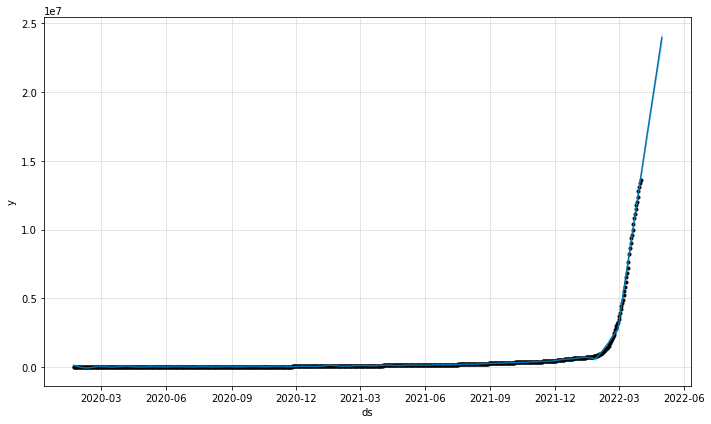

In [ ]:
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:800]) #28까지 학습 (2월 20일)
future = model.make_future_dataframe(30) #28(2월 20일) 이후 30일동안 모델을 훈련한다.
pred = model.predict(future)
model.plot(pred); #훈련한 모델을 예측한다.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/ho8_3m5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/6uth_waa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2603', 'data', 'file=/tmp/tmp9sib6oap/ho8_3m5c.json', 'init=/tmp/tmp9sib6oap/6uth_waa.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_modeltxeuadsl/prophet_model-20221024134046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


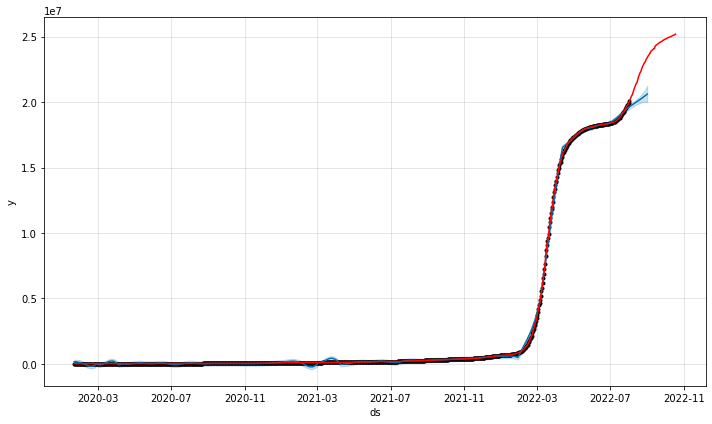

In [ ]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기
#만약 2월 20일 급증한 날이 없었더라면?

model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:923]) #28까지 학습 (2월 20일)
future = model.make_future_dataframe(30) #28(2월 20일) 이후 30일동안 모델을 훈련한다.
pred = model.predict(future)
model.plot(pred); #훈련한 모델을 예측한다.
plt.plot(df.loc[:1000]['ds'], df.loc[:1000]['y'], 'r-')
plt.show()
#20일에 사건이 없었더라면, 급격히 증가할 일이 없었더라고 예측할 수 있다.
#20일과 같은 사건이 없었더라면 코로나19가 급격히 증가 할 일이 없었을 거라고 한다.
#데이터를 통해서 우리가 원하는것을 애정을 가지고 바라보면 더 많은것들을 알고, 더많은 이야기를 할수있다.
#또한 세상을 가지는 눈을 더 깊게 가질 수 있게된다. 데이터의기반으로 우리 나름의 시각을 볼 수 있게된다.
#자신만의 통찰을 가질 수 있게된다.


In [ ]:
df.tail(30)

,ds,y
976,2022-09-24,24620128
977,2022-09-25,24634296
978,2022-09-26,24673663
979,2022-09-27,24709789
980,2022-09-28,24740635
981,2022-09-29,24769101
982,2022-09-30,24796014
983,2022-10-01,24819611
984,2022-10-02,24831761
985,2022-10-03,24848184


In [ ]:
df.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [ ]:
df.tail(30)

,ds,y
976,2022-09-24,24620128
977,2022-09-25,24634296
978,2022-09-26,24673663
979,2022-09-27,24709789
980,2022-09-28,24740635
981,2022-09-29,24769101
982,2022-09-30,24796014
983,2022-10-01,24819611
984,2022-10-02,24831761
985,2022-10-03,24848184


In [ ]:
df.loc[1:58]

,ds,y
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
5,2020-01-27,4
...,...,...
54,2020-03-16,8236
55,2020-03-17,8320
56,2020-03-18,8413
57,2020-03-19,8565


In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,774215,-14915,302813,774215,774215,-627314,-627314,-627314,-1137,-1137,-1137,-626176,-626176,-626176,0,0,0,146902
1,2020-01-23,783684,-20142,309456,783684,783684,-634403,-634403,-634403,948,948,948,-635351,-635351,-635351,0,0,0,149281
2,2020-01-24,793152,-16119,320011,793152,793152,-643273,-643273,-643273,2652,2652,2652,-645925,-645925,-645925,0,0,0,149879
3,2020-01-25,802620,-24597,318273,802620,802620,-655067,-655067,-655067,2907,2907,2907,-657974,-657974,-657974,0,0,0,147553
4,2020-01-26,812088,-41128,295933,812088,812088,-675356,-675356,-675356,-3797,-3797,-3797,-671559,-671559,-671559,0,0,0,136732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,2022-08-28,20374198,20037056,20906440,19923532,20831038,91167,91167,91167,-3797,-3797,-3797,94963,94963,94963,0,0,0,20465365
950,2022-08-29,20415166,19986650,21013559,19931382,20914959,86681,86681,86681,-2995,-2995,-2995,89676,89676,89676,0,0,0,20501847
951,2022-08-30,20456134,20001785,21081874,19923844,20981347,85975,85975,85975,1422,1422,1422,84553,84553,84553,0,0,0,20542109
952,2022-08-31,20497102,19995378,21151771,19934199,21060875,78402,78402,78402,-1137,-1137,-1137,79539,79539,79539,0,0,0,20575503


In [ ]:
pred[['ds','yhat']].loc[1:]

,ds,yhat
1,2020-01-23,149281
2,2020-01-24,149879
3,2020-01-25,147553
4,2020-01-26,136732
5,2020-01-27,131836
...,...,...
949,2022-08-28,20465365
950,2022-08-29,20501847
951,2022-08-30,20542109
952,2022-08-31,20575503


In [ ]:
pred[['ds','yhat']]

,ds,yhat
0,2020-01-22,146902
1,2020-01-23,149281
2,2020-01-24,149879
3,2020-01-25,147553
4,2020-01-26,136732
...,...,...
949,2022-08-28,20465365
950,2022-08-29,20501847
951,2022-08-30,20542109
952,2022-08-31,20575503


In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
949,2022-08-28
950,2022-08-29
951,2022-08-30
952,2022-08-31


# df2

In [ ]:
# df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds','y'])
# df

###df를 column화

In [ ]:
# df.columns=['date','count']

In [ ]:
# df

### df의 date를 index화

In [ ]:
# df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
# df = df.set_index('date')
# #print(df)
# print(df.info())

In [ ]:
# df

In [ ]:
# df2 = df.diff(1)

In [ ]:
# df2

In [ ]:
# from math import floor

In [ ]:
# def train_test_split_df2(df2, test_size2):
#   # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
#   div = floor(df2.shape[0] * (1 - test_size2)) #전체중에 1에서 뺸 사이즈
#   return df2.loc[:div], df2.loc[div + 1:]

# #2분 30초~
# #test size만 입력받아 데이터프레임을 트레이닝용 데이터프레임과 테스트용 데이터프레임으로 나눠준다.
# #나누고자 하는 숫자만 정해주면 쉽다 floor을 이용해서 전체(df.shape[0])* (1-test_size)
# #테스트 사이즈가 0.3이다 하면 0.7만큼을 트레이닝에 쓰고 나머지를 테스트에쓴다.
# #따라서 전체중에 테스트 사이즈를 1에서뺀다.
# #df.loc[:div] 처음부터 div까지 트레인, df.loc[div:] div부터 나머지를 테스트용.

In [ ]:
# train_df2, test_df2 = train_test_split_df2(df2, 0.1)
# train_df2.shape
# #450일동안 훈련

In [ ]:
# train_df2.tail()

In [ ]:
# test_df2.shape
#49일동안의 기록

In [ ]:
# test_df2.head()

In [ ]:
# test_df2

In [ ]:
# test_df2.tail()

## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet(changepoint_range=1.0) # 모델생성
model.fit(train_df)
#급격한 변화를 따르기위해 changepoint_range=1.0을 넣는다.
# 모델 학습(사이킷 런과 같다.).train_df에 데이터스탬프와 y(우리가 학습하고자 하는대상)이 같이 들어있다.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/6o_4kyea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/2e73sa1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71894', 'data', 'file=/tmp/tmp9sib6oap/6o_4kyea.json', 'init=/tmp/tmp9sib6oap/2e73sa1z.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_modelhaip9b1j/prophet_model-20221024134051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 문제 13. Prophet 모델 학습 결과 시각화하기

In [ ]:
from prophet.plot import add_changepoints_to_plot

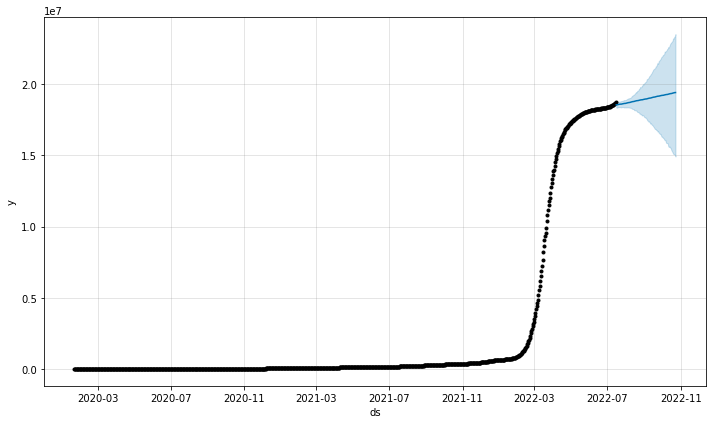

In [ ]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용
# model.plot() 메소드
pred = model.predict(test_df) #test_df에 대해 예측한다.
model.plot(pred);
# 직접 그릴필요가 없다! 그려주니까! 세미콜론을 붙이면 그래프가 하나만 나온다. 하나만 나온다.
# 검정색 부분이 트레이닝에 사용된 실제 과거데이터이고,
# 뒤에 파란색은 prediction에 사용된 데이터이다. 뒷부분에 떨어진 부분은 급격한 데이터를 따르지못한다.
# changepoint_range=1.0를 사용해 급격한 데이터를 따를 수 있게한다.
# 하늘색은 95% 신뢰구간을 의미한다.

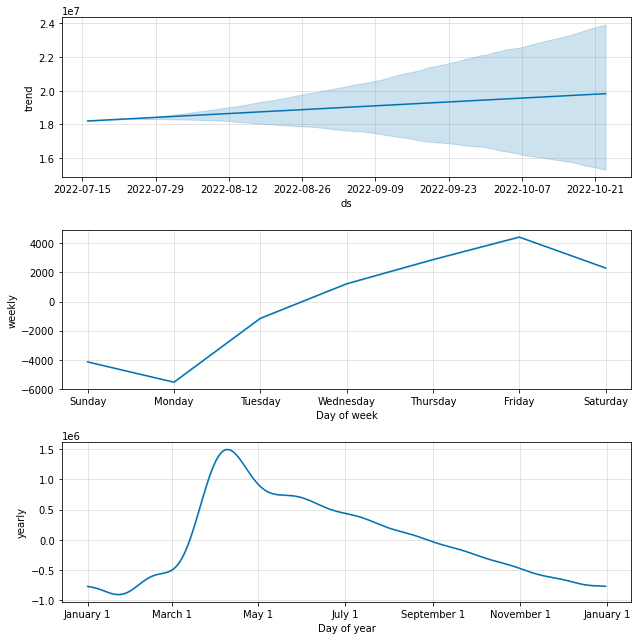

In [ ]:
model.plot_components(pred,);

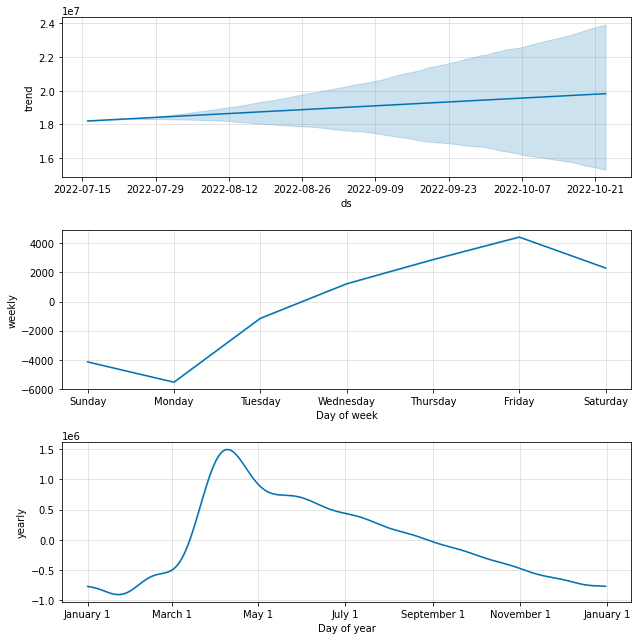

In [ ]:
model.plot_components(pred, uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=0);


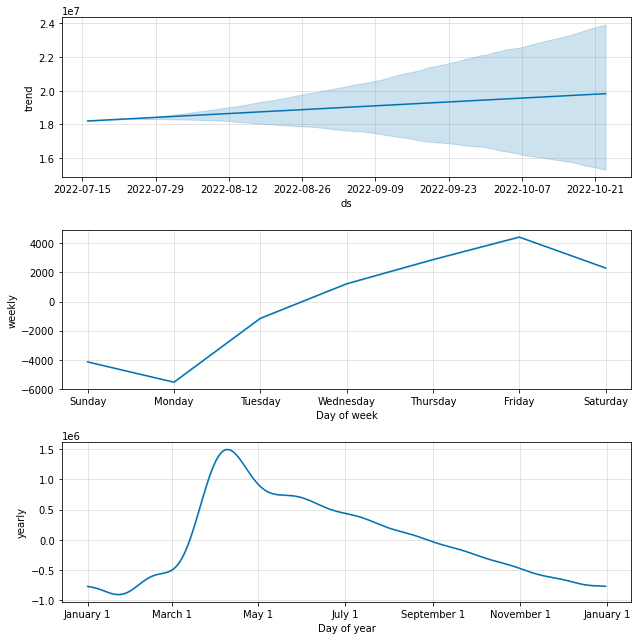

In [ ]:
#model.plot_components() 메소드 사용
model.plot_components(pred);
#전체적으로 증가하는 트렌드
#월요일에는 증가세가 줄고 수요일부터 토요일까지 증가한다.(주마다 사람들이 많이 돌아다녔다는 뜻)

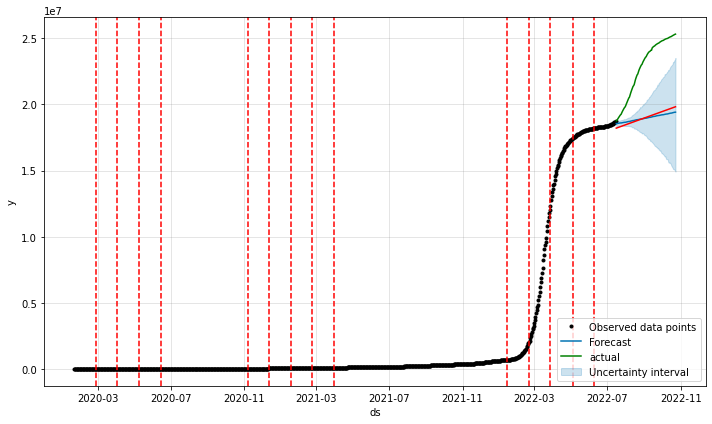

In [ ]:
#실제데이터와비교
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual') #실제데이터
changes = add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

#빨간선이 예측값, 초록선이 실제값. 신뢰구간은 95프로지만, 예측값보다, 실제값이 감염자 수가 더욱 많다.

### 문제 14. 모델 학습 결과 평가하기

In [ ]:
#사이킷런을 통해서 모델 학습 결과를 평가한다.
from sklearn.metrics import r2_score

In [ ]:
# 최대 줄 수 설정
pd.set_option('display.max_rows', 50)
# 최대 열 수 설정
pd.set_option('display.max_columns', 50)
# 표시할 가로의 길이
pd.set_option('display.width', 10000)

pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-16,18208070,18363611,18750524,18208070,18208070,344283,344283,344283,2304,2304,2304,341978,341978,341978,0,0,0,18552353
1,2022-07-17,18224394,18349547,18751640,18224394,18224394,328900,328900,328900,-4143,-4143,-4143,333042,333042,333042,0,0,0,18553293
2,2022-07-18,18240717,18362665,18754077,18240717,18240717,318307,318307,318307,-5534,-5534,-5534,323840,323840,323840,0,0,0,18559024
3,2022-07-19,18257041,18383304,18765873,18257041,18257041,313263,313263,313263,-1153,-1153,-1153,314415,314415,314415,0,0,0,18570304
4,2022-07-20,18273365,18390441,18765295,18273365,18273365,306034,306034,306034,1219,1219,1219,304815,304815,304815,0,0,0,18579399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-10-19,19758814,15119541,23218919,15575649,23578853,-379149,-379149,-379149,1219,1219,1219,-380368,-380368,-380368,0,0,0,19379665
96,2022-10-20,19775138,15101149,23179105,15512657,23681747,-383768,-383768,-383768,2879,2879,2879,-386647,-386647,-386647,0,0,0,19391370
97,2022-10-21,19791461,15072514,23324281,15465867,23752794,-388570,-388570,-388570,4427,4427,4427,-392997,-392997,-392997,0,0,0,19402891
98,2022-10-22,19807785,15035639,23369172,15384977,23838847,-397149,-397149,-397149,2304,2304,2304,-399453,-399453,-399453,0,0,0,19410636


In [ ]:
pd.options.display.float_format = '{:.0f}'.format
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-16,18208070,18363611,18750524,18208070,18208070,344283,344283,344283,2304,2304,2304,341978,341978,341978,0,0,0,18552353
1,2022-07-17,18224394,18349547,18751640,18224394,18224394,328900,328900,328900,-4143,-4143,-4143,333042,333042,333042,0,0,0,18553293
2,2022-07-18,18240717,18362665,18754077,18240717,18240717,318307,318307,318307,-5534,-5534,-5534,323840,323840,323840,0,0,0,18559024
3,2022-07-19,18257041,18383304,18765873,18257041,18257041,313263,313263,313263,-1153,-1153,-1153,314415,314415,314415,0,0,0,18570304
4,2022-07-20,18273365,18390441,18765295,18273365,18273365,306034,306034,306034,1219,1219,1219,304815,304815,304815,0,0,0,18579399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-10-19,19758814,15119541,23218919,15575649,23578853,-379149,-379149,-379149,1219,1219,1219,-380368,-380368,-380368,0,0,0,19379665
96,2022-10-20,19775138,15101149,23179105,15512657,23681747,-383768,-383768,-383768,2879,2879,2879,-386647,-386647,-386647,0,0,0,19391370
97,2022-10-21,19791461,15072514,23324281,15465867,23752794,-388570,-388570,-388570,4427,4427,4427,-392997,-392997,-392997,0,0,0,19402891
98,2022-10-22,19807785,15035639,23369172,15384977,23838847,-397149,-397149,-397149,2304,2304,2304,-399453,-399453,-399453,0,0,0,19410636


In [ ]:
pred[["ds","yhat"]]

,ds,yhat
0,2022-07-16,18552353
1,2022-07-17,18553293
2,2022-07-18,18559024
3,2022-07-19,18570304
4,2022-07-20,18579399
...,...,...
95,2022-10-19,19379665
96,2022-10-20,19391370
97,2022-10-21,19402891
98,2022-10-22,19410636


In [ ]:
# test_df와 pred를 비교하여 r2_score 평가
#r2_score 1에 가까울수록 잘 예측된것이고 0에 가까울수록(음수가 될 수도있다.) 예측이 잘 되지않았다.
print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))
#yhat이란건 predicton값이라는걸 의미한다.

R2 Score:  -3.0514797101343145


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(test_df['y'], pred['yhat']))

MAE:  3869988.409597282


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_df['y'], pred['yhat'])
print("RMSE:" , np.sqrt(MSE))

RMSE: 4308789.241995762


In [ ]:
pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2022-10-19,19758814,15119541,23218919,15575649,23578853,-379149,-379149,-379149,1219,1219,1219,-380368,-380368,-380368,0,0,0,19379665
96,2022-10-20,19775138,15101149,23179105,15512657,23681747,-383768,-383768,-383768,2879,2879,2879,-386647,-386647,-386647,0,0,0,19391370
97,2022-10-21,19791461,15072514,23324281,15465867,23752794,-388570,-388570,-388570,4427,4427,4427,-392997,-392997,-392997,0,0,0,19402891
98,2022-10-22,19807785,15035639,23369172,15384977,23838847,-397149,-397149,-397149,2304,2304,2304,-399453,-399453,-399453,0,0,0,19410636
99,2022-10-23,19824109,14922252,23514016,15317771,23913161,-410190,-410190,-410190,-4143,-4143,-4143,-406047,-406047,-406047,0,0,0,19413919


### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

# FB prophet 결과!!

In [ ]:
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/_4yfpvju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/yyamhu9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31585', 'data', 'file=/tmp/tmp9sib6oap/_4yfpvju.json', 'init=/tmp/tmp9sib6oap/yyamhu9g.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_model78y2vo5z/prophet_model-20221024134100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:41:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:41:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


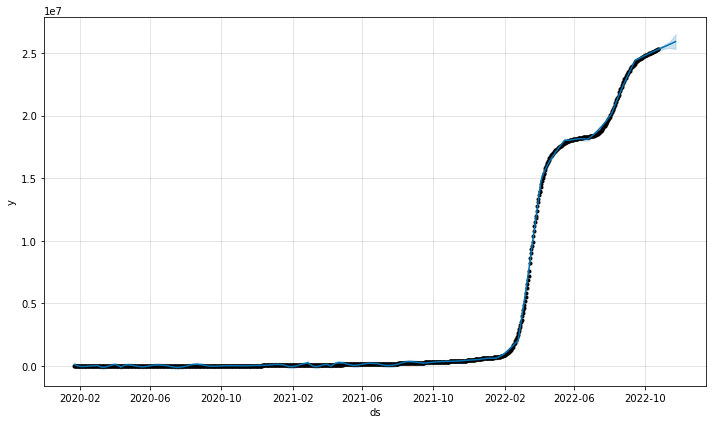

In [ ]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용

model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,1076782,-8002,255095,1076782,1076782,-949199,-949199,-949199,2909,2909,2909,-952108,-952108,-952108,0,0,0,127583
1,2020-01-23,1061851,-28335,237535,1061851,1061851,-953733,-953733,-953733,5995,5995,5995,-959727,-959727,-959727,0,0,0,108118
2,2020-01-24,1046919,-47567,221666,1046919,1046919,-960383,-960383,-960383,5612,5612,5612,-965996,-965996,-965996,0,0,0,86536
3,2020-01-25,1031987,-62585,185769,1031987,1031987,-967906,-967906,-967906,2863,2863,2863,-970769,-970769,-970769,0,0,0,64081
4,2020-01-26,1017056,-95545,169292,1017056,1017056,-981736,-981736,-981736,-7813,-7813,-7813,-973923,-973923,-973923,0,0,0,35320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2022-11-18,26438519,25371057,26295435,26001100,26834353,-602745,-602745,-602745,5612,5612,5612,-608358,-608358,-608358,0,0,0,25835774
1032,2022-11-19,26465257,25362296,26328403,25979965,26906712,-609836,-609836,-609836,2863,2863,2863,-612699,-612699,-612699,0,0,0,25855421
1033,2022-11-20,26491995,25338597,26379168,25979598,26958576,-624695,-624695,-624695,-7813,-7813,-7813,-616882,-616882,-616882,0,0,0,25867300
1034,2022-11-21,26518733,25336105,26364872,25969198,27028764,-628461,-628461,-628461,-7528,-7528,-7528,-620933,-620933,-620933,0,0,0,25890272


In [ ]:
pred.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2022-10-24,25770071,25178146,25442932,25770071,25770071,-462344,-462344,-462344,-7528,-7528,-7528,-454816,-454816,-454816,0,0,0,25307727
1007,2022-10-25,25796809,25202068,25469495,25796809,25796809,-463168,-463168,-463168,-2038,-2038,-2038,-461130,-461130,-461130,0,0,0,25333641
1008,2022-10-26,25823547,25222400,25493416,25823547,25823547,-464600,-464600,-464600,2909,2909,2909,-467508,-467508,-467508,0,0,0,25358947
1009,2022-10-27,25850285,25237079,25510577,25850285,25850285,-467957,-467957,-467957,5995,5995,5995,-473952,-473952,-473952,0,0,0,25382327
1010,2022-10-28,25877023,25262383,25543381,25877023,25877023,-474850,-474850,-474850,5612,5612,5612,-480462,-480462,-480462,0,0,0,25402173
1011,2022-10-29,25903761,25283635,25564644,25903761,25903761,-484173,-484173,-484173,2863,2863,2863,-487036,-487036,-487036,0,0,0,25419588
1012,2022-10-30,25930499,25287588,25572713,25930499,25930499,-501481,-501481,-501481,-7813,-7813,-7813,-493668,-493668,-493668,0,0,0,25429017
1013,2022-10-31,25957237,25288352,25601374,25957237,25957237,-507881,-507881,-507881,-7528,-7528,-7528,-500352,-500352,-500352,0,0,0,25449356
1014,2022-11-01,25983975,25326663,25631441,25975684,25983975,-509114,-509114,-509114,-2038,-2038,-2038,-507076,-507076,-507076,0,0,0,25474860
1015,2022-11-02,26010712,25343778,25679647,25986722,26010790,-510918,-510918,-510918,2909,2909,2909,-513826,-513826,-513826,0,0,0,25499795


In [ ]:
pred[['ds','yhat']]

,ds,yhat
0,2020-01-22,127583
1,2020-01-23,108118
2,2020-01-24,86536
3,2020-01-25,64081
4,2020-01-26,35320
...,...,...
1031,2022-11-18,25835774
1032,2022-11-19,25855421
1033,2022-11-20,25867300
1034,2022-11-21,25890272


In [ ]:
pred[['ds','yhat']].tail(31)

,ds,yhat
1005,2022-10-23,25286959
1006,2022-10-24,25307727
1007,2022-10-25,25333641
1008,2022-10-26,25358947
1009,2022-10-27,25382327
1010,2022-10-28,25402173
1011,2022-10-29,25419588
1012,2022-10-30,25429017
1013,2022-10-31,25449356
1014,2022-11-01,25474860


In [ ]:
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334


선형회귀 모델에서 오류를 측정하는 방법으로 아래 4가지를 예시를 통해 살펴보겠습니다.

- Mean Absolute Error
- Mean Absolute Percentage Error
- Mean Square Error
- Mean Percentage Error
-RAW_global_confirmed_cases.csv
-RAW_global_deaths.csv

In [ ]:
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334


## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [ ]:
df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds','y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1001,2022-10-19,25219546
1002,2022-10-20,25244255
1003,2022-10-21,25271078
1004,2022-10-22,25297334


In [ ]:
df['ds'][10]
#코로나가 첫날로부터 10일후

Timestamp('2020-02-01 00:00:00')

In [ ]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기

df.loc[10:39]
#코로나가 첫날로부터 10일후부터 2월28일까지
#2월 20일부터 급증했다는 걸 알 수 있다.

,ds,y
10,2020-02-01,12
11,2020-02-02,15
12,2020-02-03,15
13,2020-02-04,16
14,2020-02-05,19
15,2020-02-06,23
16,2020-02-07,24
17,2020-02-08,24
18,2020-02-09,25
19,2020-02-10,27


In [ ]:
#만약 2월 20일 급증한 날이 없었더라면?


### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/unqhcmvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/i1kdfmzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72984', 'data', 'file=/tmp/tmp9sib6oap/unqhcmvc.json', 'init=/tmp/tmp9sib6oap/i1kdfmzp.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_modellntiow_5/prophet_model-20221024134106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:41:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


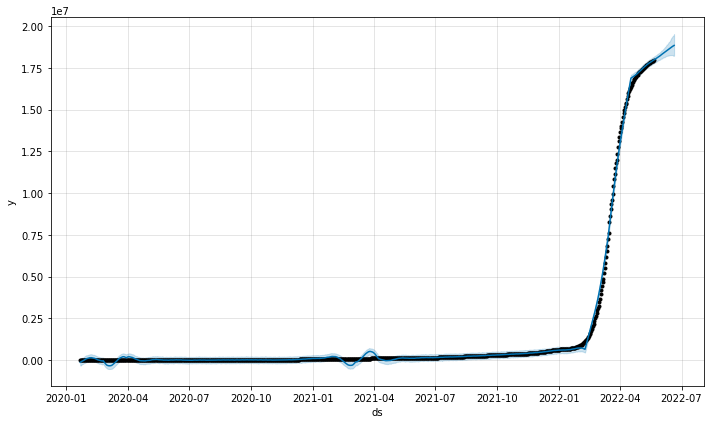

In [ ]:
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:850]) #28까지 학습 (2월 20일)
future = model.make_future_dataframe(30) #28(2월 20일) 이후 30일동안 모델을 훈련한다.
pred = model.predict(future)
model.plot(pred); #훈련한 모델을 예측한다.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/p04yau41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sib6oap/280ivwrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44813', 'data', 'file=/tmp/tmp9sib6oap/p04yau41.json', 'init=/tmp/tmp9sib6oap/280ivwrx.json', 'output', 'file=/tmp/tmp9sib6oap/prophet_modelca_w4ovs/prophet_model-20221024134111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:41:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


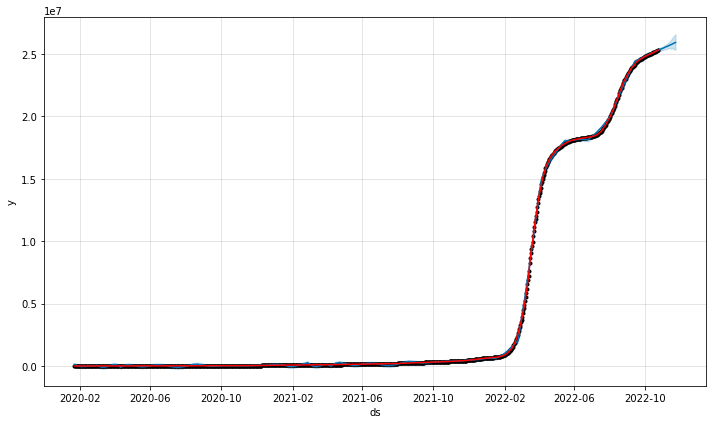

In [ ]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기
#만약 2월 20일 급증한 날이 없었더라면?

model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:1020]) #28까지 학습 (2월 20일)
future = model.make_future_dataframe(30) #28(2월 20일) 이후 30일동안 모델을 훈련한다.
pred = model.predict(future)
model.plot(pred); #훈련한 모델을 예측한다.
plt.plot(df.loc[:1020]['ds'], df.loc[:1050]['y'], 'r-')
plt.show()
#20일에 사건이 없었더라면, 급격히 증가할 일이 없었더라고 예측할 수 있다.
#20일과 같은 사건이 없었더라면 코로나19가 급격히 증가 할 일이 없었을 거라고 한다.
#데이터를 통해서 우리가 원하는것을 애정을 가지고 바라보면 더 많은것들을 알고, 더많은 이야기를 할수있다.
#또한 세상을 가지는 눈을 더 깊게 가질 수 있게된다. 데이터의기반으로 우리 나름의 시각을 볼 수 있게된다.
#자신만의 통찰을 가질 수 있게된다.


In [ ]:
df.tail(30)

,ds,y
976,2022-09-24,24620128
977,2022-09-25,24634296
978,2022-09-26,24673663
979,2022-09-27,24709789
980,2022-09-28,24740635
981,2022-09-29,24769101
982,2022-09-30,24796014
983,2022-10-01,24819611
984,2022-10-02,24831761
985,2022-10-03,24848184


In [ ]:
df.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [ ]:
df.tail(30)

,ds,y
976,2022-09-24,24620128
977,2022-09-25,24634296
978,2022-09-26,24673663
979,2022-09-27,24709789
980,2022-09-28,24740635
981,2022-09-29,24769101
982,2022-09-30,24796014
983,2022-10-01,24819611
984,2022-10-02,24831761
985,2022-10-03,24848184


In [ ]:
df.loc[1:58]

,ds,y
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
5,2020-01-27,4
...,...,...
54,2020-03-16,8236
55,2020-03-17,8320
56,2020-03-18,8413
57,2020-03-19,8565


In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,1076782,-979,259364,1076782,1076782,-949199,-949199,-949199,2909,2909,2909,-952108,-952108,-952108,0,0,0,127583
1,2020-01-23,1061851,-20489,237734,1061851,1061851,-953733,-953733,-953733,5995,5995,5995,-959727,-959727,-959727,0,0,0,108118
2,2020-01-24,1046919,-49789,214345,1046919,1046919,-960383,-960383,-960383,5612,5612,5612,-965996,-965996,-965996,0,0,0,86536
3,2020-01-25,1031987,-63580,202333,1031987,1031987,-967906,-967906,-967906,2863,2863,2863,-970769,-970769,-970769,0,0,0,64081
4,2020-01-26,1017056,-107853,161899,1017056,1017056,-981736,-981736,-981736,-7813,-7813,-7813,-973923,-973923,-973923,0,0,0,35320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2022-11-18,26438519,25412290,26374897,26049062,26941150,-602745,-602745,-602745,5612,5612,5612,-608358,-608358,-608358,0,0,0,25835774
1032,2022-11-19,26465257,25372629,26429997,26032732,27011413,-609836,-609836,-609836,2863,2863,2863,-612699,-612699,-612699,0,0,0,25855421
1033,2022-11-20,26491995,25389416,26491594,26011822,27093577,-624695,-624695,-624695,-7813,-7813,-7813,-616882,-616882,-616882,0,0,0,25867300
1034,2022-11-21,26518733,25342545,26517584,25986825,27168293,-628461,-628461,-628461,-7528,-7528,-7528,-620933,-620933,-620933,0,0,0,25890272


In [ ]:
pred[['ds','yhat']].loc[1:]

,ds,yhat
1,2020-01-23,108118
2,2020-01-24,86536
3,2020-01-25,64081
4,2020-01-26,35320
5,2020-01-27,19239
...,...,...
1031,2022-11-18,25835774
1032,2022-11-19,25855421
1033,2022-11-20,25867300
1034,2022-11-21,25890272


In [ ]:
pred[['ds','yhat']]

,ds,yhat
0,2020-01-22,127583
1,2020-01-23,108118
2,2020-01-24,86536
3,2020-01-25,64081
4,2020-01-26,35320
...,...,...
1031,2022-11-18,25835774
1032,2022-11-19,25855421
1033,2022-11-20,25867300
1034,2022-11-21,25890272


In [ ]:
pred[['ds','yhat']].tail(30)

,ds,yhat
1006,2022-10-24,25307727
1007,2022-10-25,25333641
1008,2022-10-26,25358947
1009,2022-10-27,25382327
1010,2022-10-28,25402173
1011,2022-10-29,25419588
1012,2022-10-30,25429017
1013,2022-10-31,25449356
1014,2022-11-01,25474860
1015,2022-11-02,25499795


In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
1031,2022-11-18
1032,2022-11-19
1033,2022-11-20
1034,2022-11-21


In [ ]:
model(future)


TypeError: ignored

In [ ]:
# round(pred.yhat,1)
# print(pred.ds,round(pred.yhat,1))

In [ ]:
# print(pred.ds)

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# df1 = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds','yhat'])
# df1[['ds','yhat']].plot.scatter(x='ds',y='yhat')
# df1